# (Ford GoBike System Data OverView)
## by (Kareem Mohamed-AbdElKareem)

## Investigation Overview

> The Overall Goal of this Investigation is to go through some nice relations on GoBike System

## Dataset Overview

> Data provides 3023992 bike trip taking place in 2017 and 2018 including trip duration, start station info, end station info.

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
df_cleaned = pd.read_csv('trip_data_files.csv')
df_cleaned.drop(df_cleaned.columns[[0]] ,axis = 1, inplace = True)
df_cleaned.drop(['bike_share_for_all_trip'] ,axis = 1, inplace = True)
df_cleaned = df_cleaned[df_cleaned['start_station_id'].isnull() == False]
df_cleaned = df_cleaned[df_cleaned['member_birth_year'].isnull() == False]
df_cleaned = df_cleaned[df_cleaned['member_gender'].isnull() == False]
df_cleaned.start_time = pd.to_datetime(df_cleaned.start_time)
df_cleaned.end_time = pd.to_datetime(df_cleaned.end_time)
df_cleaned.user_type = df_cleaned.user_type.astype('category')
df_cleaned.member_gender = df_cleaned.member_gender.astype('category')
df_cleaned.bike_id = df_cleaned.bike_id.astype(str)
df_cleaned.start_station_id = df_cleaned.bike_id.astype(str)
df_cleaned.end_station_id = df_cleaned.bike_id.astype(str)
df_cleaned['user_age'] = 2019 - df_cleaned['member_birth_year']
df_cleaned.user_age = df_cleaned.user_age.astype(int)
df_cleaned = df_cleaned.query('user_age <= 66')


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Effect of Months on Trip Count

> Here We can see that March and April are the two most Months with Trip Count

<Figure size 841.68x595.44 with 0 Axes>

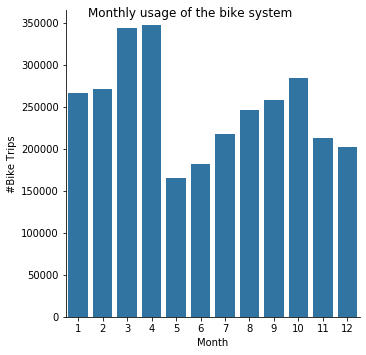

In [13]:
df_cleaned['start_time_month']=df_cleaned['start_time'].dt.month.astype(int)
default_c = sb.color_palette()[0]
# monthly usege of the bike sharing system
plt.figure(figsize=[ 11.69, 8.27])
k = sb.catplot(data=df_cleaned, x='start_time_month', kind='count', color = default_c)
k.set_axis_labels("Month", "#Bike Trips")
k.fig.suptitle('Monthly usage of the bike system');

## Effect of Months & User Type on Trip Count

> We can see regardless the User Type , both MArch and April remains the most favourtie Months

<Figure size 841.68x595.44 with 0 Axes>

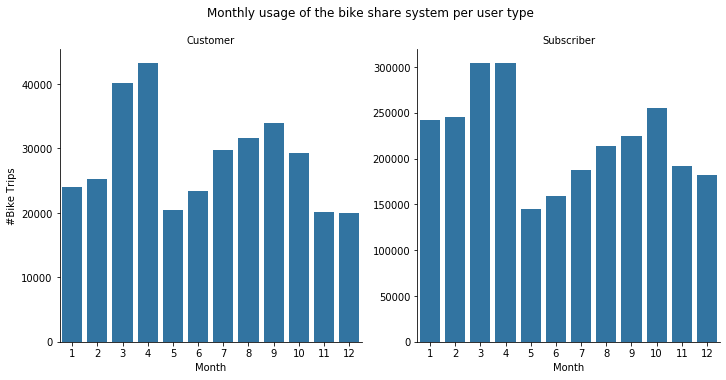

In [12]:
plt.figure(figsize=[ 11.69, 8.27])
k = sb.catplot(data=df_cleaned, x='start_time_month', col="user_type", kind='count', sharey = False,
            color = default_c)
k.set_axis_labels("Month", "#Bike Trips")
k.set_titles("{col_name}")
k.fig.suptitle('Monthly usage of the bike share system per user type', y=1.05, );

# What is effect of Gender and User Type on Trips Counts?
> We can see that males remain domenant regardless the type of the users


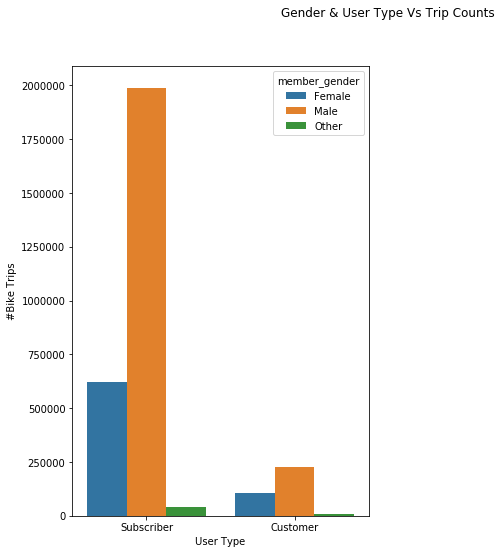

In [14]:
#plt.figure(figsize = [10, 5])
plt.figure(figsize=[ 11.69, 8.27])

# code for the bar chart
plt.subplot(1, 2, 1)

k = sb.countplot(data=df_cleaned, x="user_type", hue="member_gender", order=df_cleaned.user_type.value_counts().index)
k.set_xlabel('User Type')
k.set_ylabel('#Bike Trips');
k.figure.suptitle('Gender & User Type Vs Trip Counts');